Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

Dataset Link: https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants

Reading the dataset

In [2]:
df=pd.read_csv("zomato.csv")

Data has 51717 Rows and 17 Columns or Features

In [3]:
df.shape

(51717, 17)

Reading the dataset

In [4]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Dataset Types of each columns

In [5]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

Dataset Columns or Features Names

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Checking null value in dataset

In [7]:
df.isnull()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
51713,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
51714,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Summing Null values of columns

In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Basic information regarding dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Droping unwanted Columns

In [10]:
zomato=df.drop(['url','phone','dish_liked'],axis=1)

In [11]:
zomato.head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Checking Duplicate rows & Droping it

In [12]:
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [13]:
zomato.dropna(how='any',inplace=True)

In [14]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

Now Dataframe contain No Null Values

In [15]:
zomato.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

Changing the Name of the columns to shorten it

In [16]:
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

Changing the datatype of the column & replacing (, to .)

In [17]:
zomato['cost'] = zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


Ratings of the Resturants

In [18]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

removing 'NEW' , '/' and '-' from rate coloumn & changing datatype to float

In [19]:
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [20]:
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

calculating some statistical data of numerical columns

In [21]:
zomato.describe() 

,rate,votes,cost
count,41237.000000,41237.000000,41237.000000
mean,3.702030,352.772001,369.586259
std,0.440034,884.409230,242.522954
min,1.800000,0.000000,1.000000
25%,3.400000,21.000000,200.000000
50%,3.700000,73.000000,400.000000
75%,4.000000,277.000000,500.000000
max,4.900000,16832.000000,950.000000


Replacing the value of the cloumns

In [22]:
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

Unique Cost

In [23]:
zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

Correlation between different variables

In [24]:
zomato.corr()

,online_order,book_table,rate,votes,cost
online_order,1.000000,-0.054894,0.069042,-0.013278,0.180782
book_table,-0.054894,1.000000,0.426027,0.393270,-0.266651
rate,0.069042,0.426027,1.000000,0.435237,-0.115346
votes,-0.013278,0.393270,0.435237,1.000000,-0.116118
cost,0.180782,-0.266651,-0.115346,-0.116118,1.000000


HeatMap

Text(0.5, 1.0, 'HeatMAP')

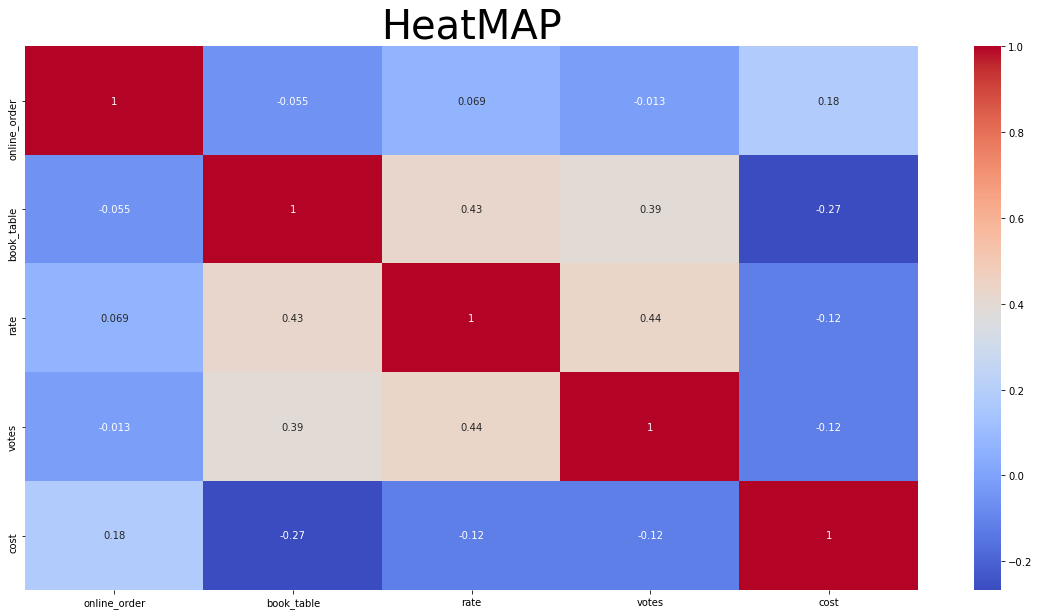

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(zomato.corr(),cmap='coolwarm',annot=True)
plt.title('HeatMAP',fontdict={'fontsize':40})

Histogram of "Cost" column 

array([[<AxesSubplot:title={'center':'cost'}>]], dtype=object)

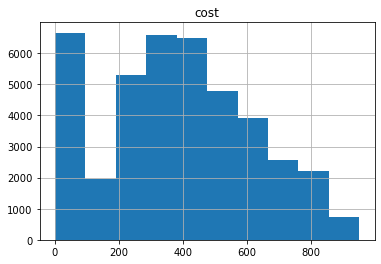

In [26]:
zomato.hist(column='cost')

Restaurant accepting online orders & bar chart comparing & visualize the data

In [27]:
zomato.online_order.value_counts()

True     27081
False    14156
Name: online_order, dtype: int64

Text(0, 0.5, 'counts')

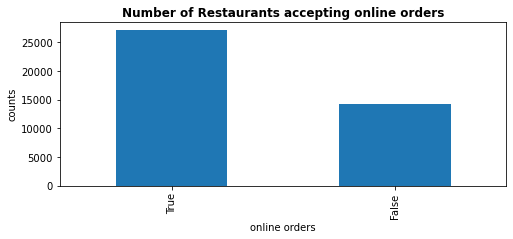

In [28]:
plt.figure(figsize=(8,3))
ax =zomato.online_order.value_counts().plot(kind='bar')
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')
plt.ylabel('counts')

Restaurant have option to book a table & bar chart comparing & visualize the data

In [29]:
zomato.book_table.value_counts()

False    34938
True      6299
Name: book_table, dtype: int64

Text(0, 0.5, 'counts')

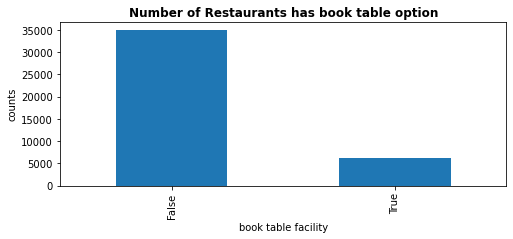

In [30]:
plt.figure(figsize=(8,3))
ax =zomato.book_table.value_counts().plot(kind='bar')
plt.title('Number of Restaurants has book table option', weight='bold')
plt.xlabel('book table facility')
plt.ylabel('counts')

Rating of the Resturant

In [31]:
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [32]:
zomato['rate'].nunique()

31

ploting 'Rating' vs 'Online order' with parameters

Text(0.5, 1.0, 'rate vs oline order')

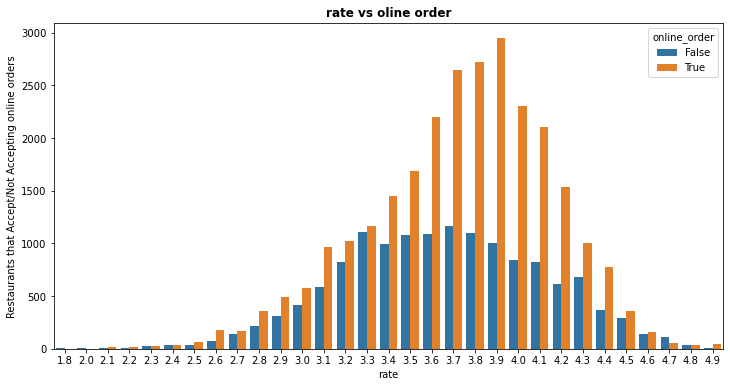

In [33]:
plt.figure(figsize = (12,6))
sns.countplot(x=zomato['rate'], hue = zomato['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

Top Rated Resturants

In [34]:
top_rate=zomato.sort_values(by="rate", ascending= False)
top_rate.head(10)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
38315,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,True,False,4.9,1749,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 4.0', ""RATED\n Looks like there's a ...",[],Desserts,Residency Road
16171,"136, Ground Floor, 1st Cross, 5th Block, Jyoti...",Asia Kitchen By Mainland China,True,True,4.9,2202,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",1.5,"[('Rated 5.0', ""RATED\n Everything from the a...",[],Delivery,Jayanagar
26869,"136, Ground Floor, 1st Cross, 5th Block, Jyoti...",Asia Kitchen By Mainland China,True,True,4.9,2249,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",1.5,"[('Rated 3.0', 'RATED\n Hmm not great not bad...",[],Dine-out,Koramangala 6th Block
15326,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",Ab'S - Absolute Barbecues,False,True,4.9,6404,BTM,Casual Dining,"European, Mediterranean, North Indian, BBQ",1.6,"[('Rated 5.0', ""RATED\n Best place for buffet...",[],Buffet,Jayanagar
39325,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,True,True,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1.6,"[('Rated 5.0', ""RATED\n This is an absolute g...",[],Delivery,Sarjapur Road
40001,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,True,True,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1.6,"[('Rated 4.0', 'RATED\n Visiting a microbrewe...",[],Drinks & nightlife,Sarjapur Road
14568,"460, 2nd Cross, Krishna Temple Road, Indiranag...",Milano Ice Cream,False,False,4.9,2090,Indiranagar,Dessert Parlor,"Ice Cream, Desserts",400.0,"[('Rated 5.0', 'RATED\n Loveeee the ice cream...",[],Desserts,Indiranagar
3172,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,True,True,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1.6,"[('Rated 5.0', 'RATED\n I have been to this p...",[],Delivery,Bellandur
37450,"26/1, Dr Rajkumar Road, Brigade Gateway Campus...",Punjab Grill,True,True,4.9,1985,Malleshwaram,Casual Dining,"North Indian, Mughlai",2.0,"[('Rated 5.0', 'RATED\n Good food, great serv...",[],Dine-out,Rajajinagar
40708,"120 A3, 2nd Floor, Santosh Tower, EPIP Industr...",Flechazo,False,True,4.9,3004,Whitefield,Casual Dining,"Asian, Mediterranean, North Indian, BBQ",1.4,"[('Rated 4.0', ""RATED\n Last week I had a Tea...",[],Dine-out,Whitefield


Top Rated Resturant with min cost of food

In [35]:
top_rate_and_cost = zomato.sort_values(by=["rate", "cost"], ascending=False)
top_rate_and_cost.head(10)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
4132,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,True,False,4.9,1746,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 3.0', ""RATED\n Waffles are totally w...",[],Delivery,Brigade Road
4659,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,True,False,4.9,1746,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 3.0', ""RATED\n Waffles are totally w...",[],Desserts,Brigade Road
8184,"13 KHB Colony, 17th Main, M.I.G, Koramangala 5...",Belgian Waffle Factory,True,False,4.9,201,Koramangala 5th Block,Dessert Parlor,Desserts,400.0,"[('Rated 4.0', ""RATED\n FYI, I have no photos...",[],Desserts,BTM
9355,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,True,False,4.9,1744,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 3.0', ""RATED\n Waffles are totally w...",[],Delivery,Church Street
9852,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,True,False,4.9,1744,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 3.0', ""RATED\n Waffles are totally w...",[],Desserts,Church Street
11635,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,True,False,4.9,1743,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 3.0', ""RATED\n Waffles are totally w...",[],Delivery,Frazer Town
14109,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,True,False,4.9,1735,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 5.0', 'RATED\n A small cute place in...",[],Delivery,Indiranagar
14568,"460, 2nd Cross, Krishna Temple Road, Indiranag...",Milano Ice Cream,False,False,4.9,2090,Indiranagar,Dessert Parlor,"Ice Cream, Desserts",400.0,"[('Rated 5.0', 'RATED\n Loveeee the ice cream...",[],Desserts,Indiranagar
30030,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,True,False,4.9,1749,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 4.0', ""RATED\n Looks like there's a ...",[],Delivery,Lavelle Road
30525,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,True,False,4.9,1749,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 4.0', ""RATED\n Looks like there's a ...","['Fudging Good Waffle [Bubble]', 'Bubble Kit K...",Desserts,Lavelle Road


No of users voted to share the rating of the Resturants

In [36]:
zomato['votes'].head()

0    775
1    787
2    918
3     88
4    166
Name: votes, dtype: int64

In [37]:
zomato['votes'].nunique()

2323

Scatter Plot Showing votes & rating by users

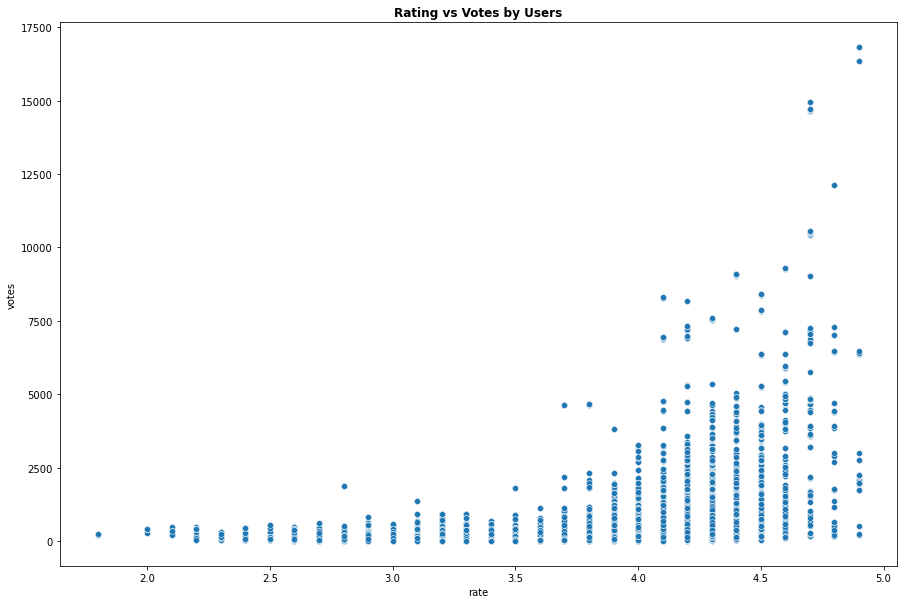

In [38]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='rate',y='votes',data=zomato)
plt.title("Rating vs Votes by Users",weight = 'bold')
plt.show()

Resturant with maximum no of votes by user

In [39]:
top_votes=zomato.sort_values(by="votes", ascending= False)
top_votes.head(10)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
39651,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,True,True,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1.6,"[('Rated 4.0', 'RATED\n Visiting a microbrewe...",[],Dine-out,Sarjapur Road
39325,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,True,True,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1.6,"[('Rated 5.0', ""RATED\n This is an absolute g...",[],Delivery,Sarjapur Road
40001,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,True,True,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1.6,"[('Rated 4.0', 'RATED\n Visiting a microbrewe...",[],Drinks & nightlife,Sarjapur Road
3936,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,True,True,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1.6,"[('Rated 5.0', 'RATED\n I have been to this p...","['Creamy Mushroom and Truffle Soup', 'Kung Pao...",Drinks & nightlife,Bellandur
3825,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,True,True,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1.6,"[('Rated 5.0', 'RATED\n I have been to this p...","['Creamy Mushroom and Truffle Soup', 'Kung Pao...",Dine-out,Bellandur
3172,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,True,True,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1.6,"[('Rated 5.0', 'RATED\n I have been to this p...",[],Delivery,Bellandur
14690,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Toit,False,False,4.7,14956,Indiranagar,Microbrewery,"Italian, American, Pizza",1.5,"[('Rated 4.0', ""RATED\n The crowd keeps flowi...",[],Dine-out,Indiranagar
15212,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Toit,False,False,4.7,14956,Indiranagar,Microbrewery,"Italian, American, Pizza",1.5,"[('Rated 4.0', ""RATED\n The crowd keeps flowi...",[],Drinks & nightlife,Indiranagar
29075,"28, 4th 'B' Cross, Koramangala 5th Block, Bang...",Truffles,False,False,4.7,14726,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900.0,"[('Rated 3.0', ""RATED\n Not bad but the burge...",[],Dine-out,Koramangala 7th Block
26850,"28, 4th 'B' Cross, Koramangala 5th Block, Bang...",Truffles,False,False,4.7,14723,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900.0,"[('Rated 3.0', ""RATED\n Not bad but the burge...",[],Dine-out,Koramangala 6th Block


relationship between Price & rating of the resturants

Text(1.0, 1.0, 'Price Vs Rating')

<Figure size 1440x720 with 0 Axes>

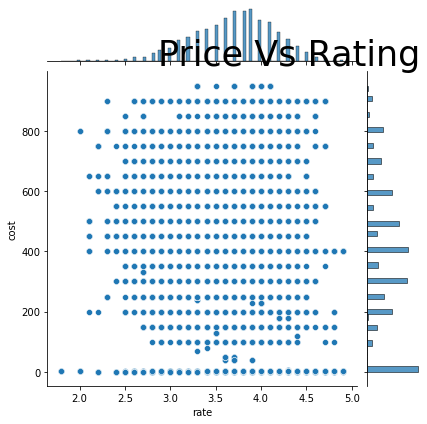

In [40]:
plt.figure(figsize=(20,10))
sns.jointplot(x=zomato['rate'],y=zomato['cost'],kind='scatter')
plt.title('Price Vs Rating',fontdict={'fontsize':35},loc='right')

Total no of locations

In [41]:
zomato['location'].nunique()

92

Pie chart Showing no of loacation where resturant is located

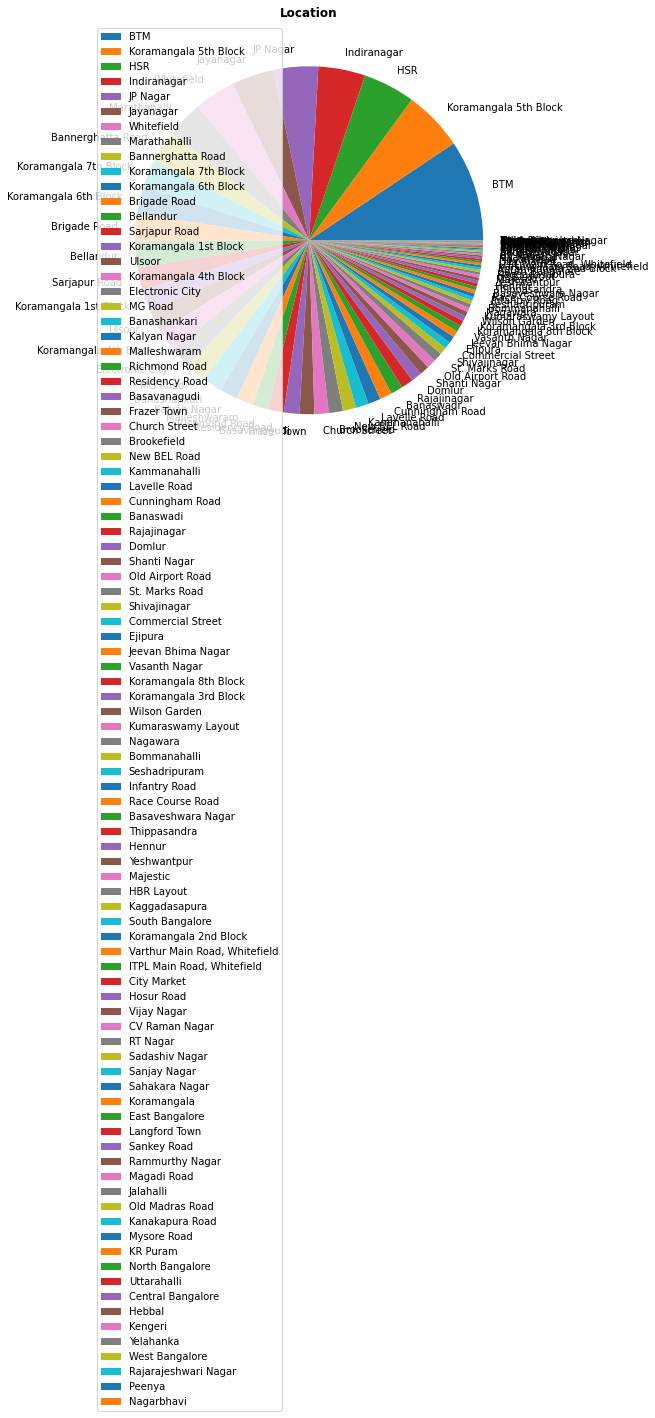

In [42]:
plt.figure(figsize=(8,8))
ax =zomato.location.value_counts().plot(kind='pie')
plt.title('Location', weight='bold')
plt.ylabel('')
plt.legend()

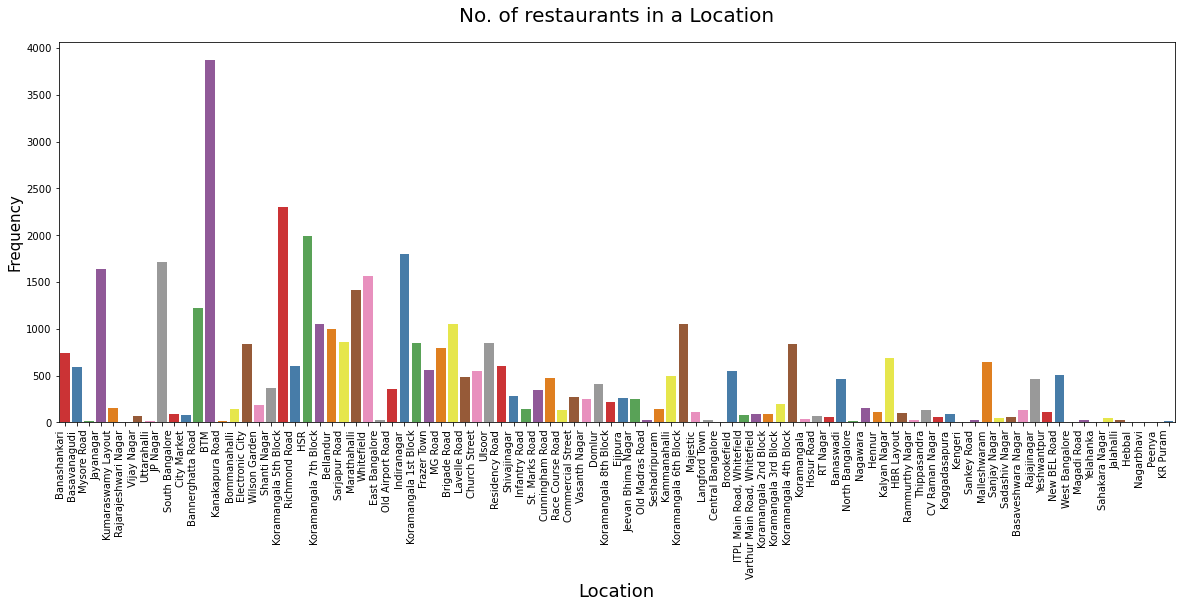

In [43]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
plt.title('No. of restaurants in a Location',size = 20,pad=20)
plt.savefig("Restaurants in Location")

Top 10 Location of Resturants

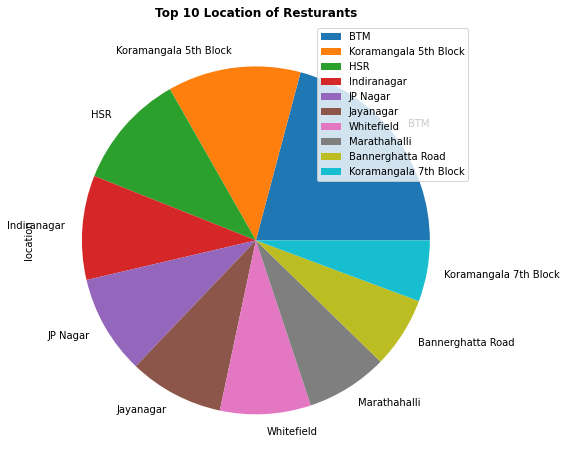

In [44]:
plt.figure(figsize=(8,8))
ax =zomato.location.value_counts()[:10].plot(kind='pie')
plt.title('Top 10 Location of Resturants', weight='bold')
plt.legend()

Type of resturants

In [45]:
zomato['rest_type'].nunique()

87

Text(0.5, 1.0, 'Restaurant types')

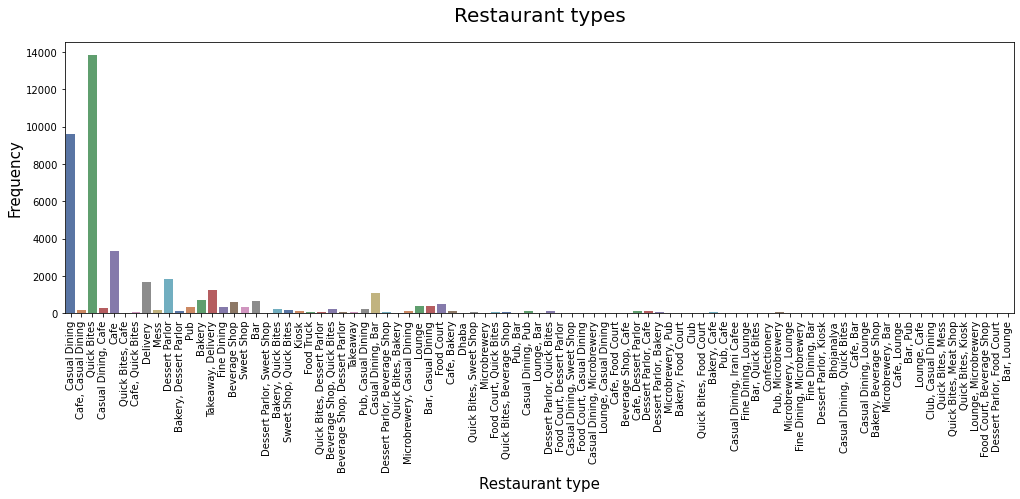

In [46]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato, palette = "deep")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90)
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
plt.title('Restaurant types',fontsize = 20 ,pad=20)

Top 10 Types of resturants

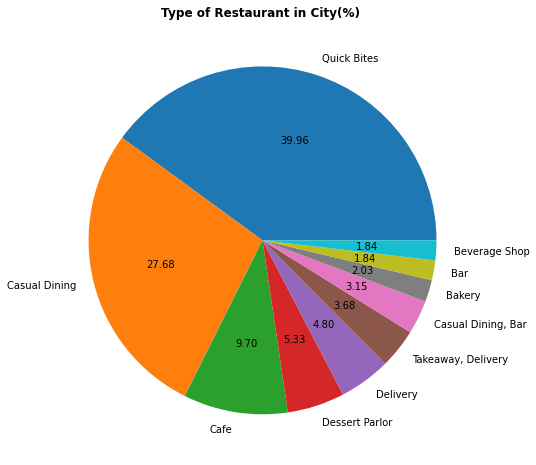

In [47]:
plt.figure(figsize=(8,8))
values = zomato.rest_type.value_counts()[:10]
labels = zomato['rest_type'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Type of Restaurant in City(%) ', weight='bold')
plt.show()

Top Resturants with maximum no of Stores

In [48]:
zomato.name.value_counts().head(20)

Cafe Coffee Day        86
Onesta                 85
Empire Restaurant      69
Five Star Chicken      68
Kanti Sweets           68
Just Bake              68
Baskin Robbins         62
Pizza Hut              60
Petoo                  60
Kfc                    60
Mcdonald'S             59
Subway                 59
Domino'S Pizza         59
Smoor                  59
Sweet Truth            58
Polar Bear             58
Faasos                 56
Beijing Bites          56
Burger King            55
Smally'S Resto Cafe    54
Name: name, dtype: int64

Text(0.5, 1.0, 'Top 20 Restaurants with no of Stores')

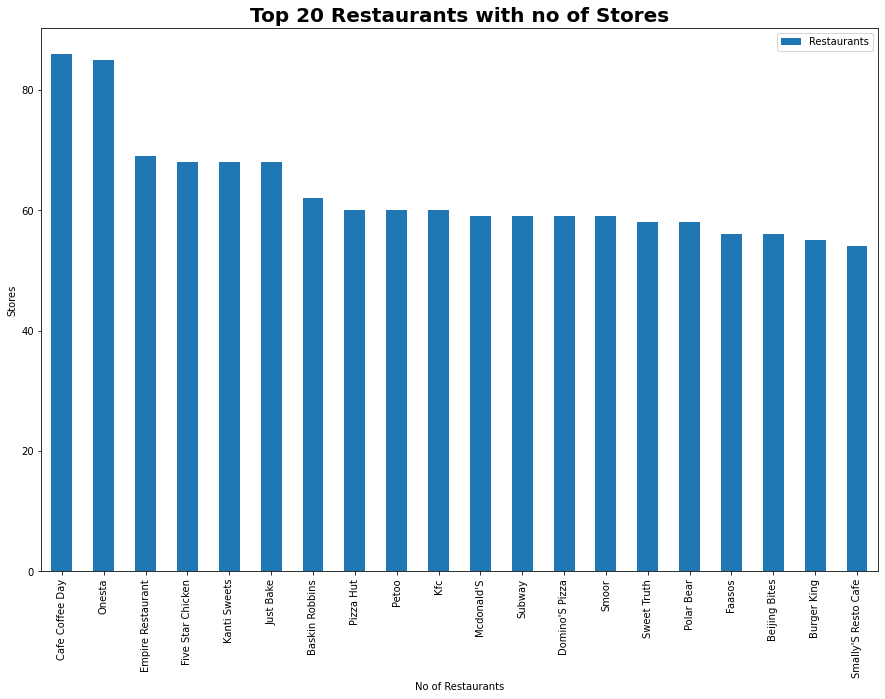

In [49]:
plt.figure(figsize=(15,10))
ax =zomato.name.value_counts()[:20].plot(kind='bar')
ax.legend(['Restaurants'])
plt.xlabel('No of Restaurants')
plt.ylabel('Stores')
plt.title("Top 20 Restaurants with no of Stores", fontsize=20, weight='bold')

Restaurant type with rating

In [50]:
top_rest_type_and_rate = zomato.sort_values(by=["rest_type", "rate"], ascending=False)
top_rest_type_and_rate.head(10)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
5509,"710, Thubarahalli, Varthur Main Road, Whitefie...",Polar Bear,True,False,4.5,41,"Varthur Main Road, Whitefield","Takeaway, Delivery","Desserts, Ice Cream",300.0,"[('Rated 5.0', 'RATED\n After hearing so much...","['Berry Colate', 'Brownie Fudge', 'Hot Chocola...",Delivery,Brookefield
6174,"710, Thubarahalli, Varthur Main Road, Whitefie...",Polar Bear,True,False,4.5,41,"Varthur Main Road, Whitefield","Takeaway, Delivery","Desserts, Ice Cream",300.0,"[('Rated 5.0', 'RATED\n After hearing so much...",[],Desserts,Brookefield
32312,"710, Thubarahalli, Varthur Main Road, Whitefie...",Polar Bear,True,False,4.5,48,"Varthur Main Road, Whitefield","Takeaway, Delivery","Desserts, Ice Cream",300.0,"[('Rated 4.0', ""RATED\n Ahhh... Polar Bear. W...","['Brownie Fudge', 'Hot Chocolate Fudge( Regula...",Delivery,Marathahalli
40081,"710, Thubarahalli, Varthur Main Road, Whitefie...",Polar Bear,True,False,4.5,53,"Varthur Main Road, Whitefield","Takeaway, Delivery","Desserts, Ice Cream",300.0,"[('Rated 4.0', 'RATED\n Polar Bear presents a...","['Brownie Fudge', 'Hot Chocolate Fudge( Regula...",Delivery,Whitefield
15895,"18th Main Park, 17th H Main Road, Koramangala ...",Black Deer,True,False,4.4,149,Koramangala 5th Block,"Takeaway, Delivery","Beverages, Desserts",350.0,"[('Rated 4.0', ""RATED\n I'm not a big fan of ...","['Red Velvet Ice Cream Sundaes', 'Fruit Basket...",Delivery,Jayanagar
21521,"18th Main Park, 17th H Main Road, Koramangala ...",Black Deer,True,False,4.4,149,Koramangala 5th Block,"Takeaway, Delivery","Beverages, Desserts",350.0,"[('Rated 4.0', ""RATED\n I'm not a big fan of ...","['Red Velvet Ice Cream Sundaes', 'Fruit Basket...",Delivery,Koramangala 4th Block
22288,"18th Main Park, 17th H Main Road, Koramangala ...",Black Deer,True,False,4.4,149,Koramangala 5th Block,"Takeaway, Delivery","Beverages, Desserts",350.0,"[('Rated 4.0', ""RATED\n I'm not a big fan of ...",[],Desserts,Koramangala 4th Block
23972,"18th Main Park, 17th H Main Road, Koramangala ...",Black Deer,True,False,4.4,149,Koramangala 5th Block,"Takeaway, Delivery","Beverages, Desserts",350.0,"[('Rated 4.0', ""RATED\n I'm not a big fan of ...",[],Delivery,Koramangala 5th Block
24062,"57, Industrial Layout, Near J N C College, Kor...",Box8- Desi Meals,True,False,4.4,405,Koramangala 5th Block,"Takeaway, Delivery","North Indian, Mughlai, Fast Food",500.0,"[('Rated 5.0', 'RATED\n Amazing, amazing, ama...","['Dal Makhni Meal', 'Dilli Rajma Meal', 'Chole...",Delivery,Koramangala 5th Block
24445,"18th Main Park, 17th H Main Road, Koramangala ...",Black Deer,True,False,4.4,149,Koramangala 5th Block,"Takeaway, Delivery","Beverages, Desserts",350.0,"[('Rated 4.0', ""RATED\n I'm not a big fan of ...","['Classic Belgian Waffle', 'Chocofilll Belgian...",Desserts,Koramangala 5th Block


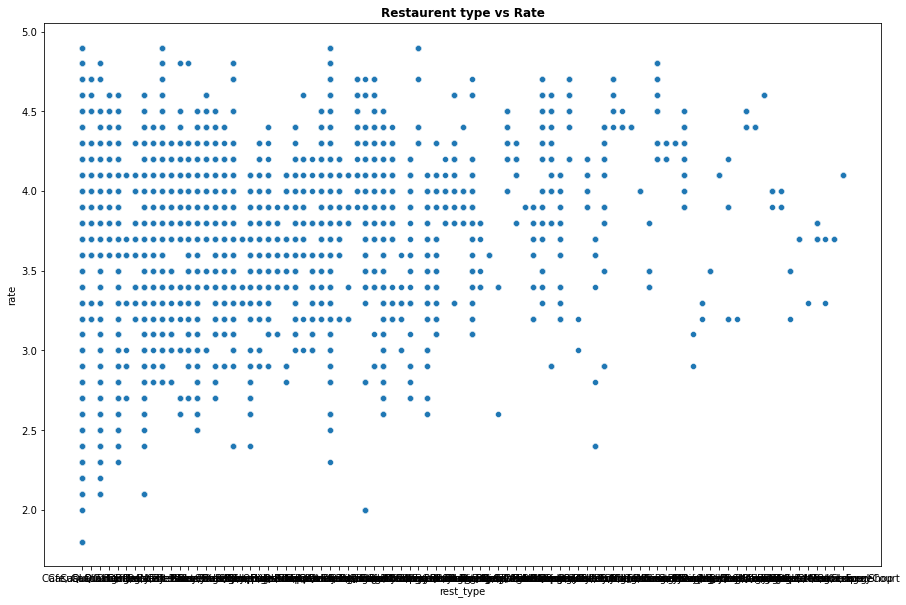

In [51]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='rest_type',y='rate',data=zomato)
plt.title("Restaurent type vs Rate",weight = 'bold')
plt.show()

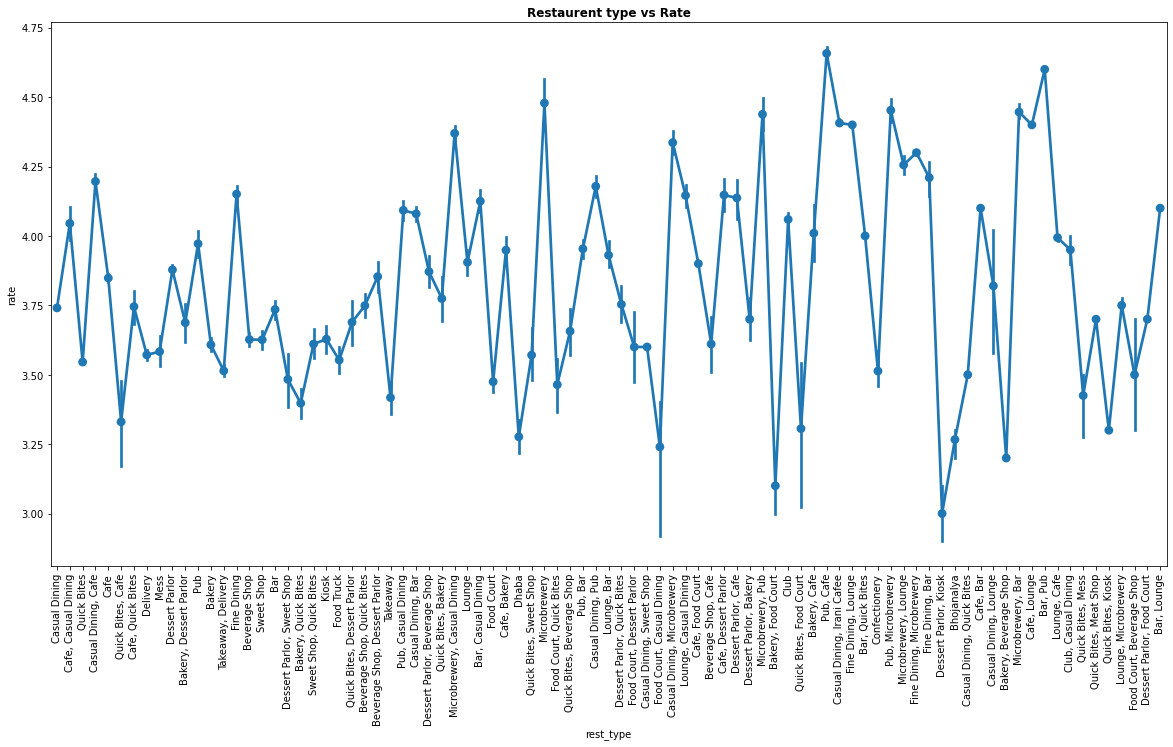

In [52]:
ax=plt.subplots(figsize=(20,10))
g = sns.pointplot(x=zomato["rest_type"], y=zomato["rate"])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

Cost of Restuarant

C:\Users\pjpun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pjpun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pjpun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cost of Restuarant')

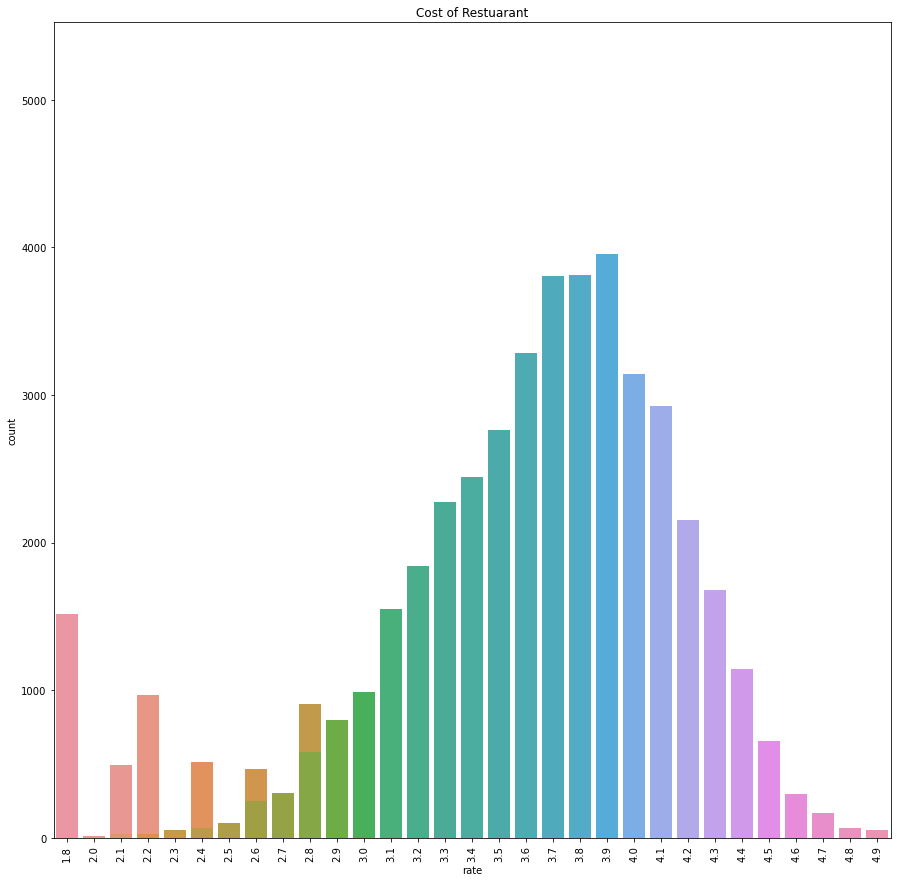

In [53]:
sns.countplot(zomato['cost'])
sns.countplot(zomato['cost']).set_xticklabels(sns.countplot(zomato['rate']).get_xticklabels(), rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

In [54]:
top_cost = zomato.sort_values(by=["cost"], ascending=False)
top_cost.head(10)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
1817,"The HHI Select Bengaluru Hotel, 686, 15th Cros...",The Onyx - The Hhi Select Bengaluru,False,False,3.3,177,JP Nagar,Casual Dining,"North Indian, Chinese, Continental",950.0,"[('Rated 5.0', 'RATED\n I had gone with my gi...",[],Dine-out,Bannerghatta Road
4999,"1, 1st Floor, Church Street, Bangalore",Ayda Persian Kitchen,True,False,3.9,224,Church Street,Casual Dining,"North Indian, Iranian",950.0,"[('Rated 4.0', 'RATED\n This tiny hidden gem ...",[],Dine-out,Brigade Road
11805,"1, 1st Floor, Church Street, Bangalore",Ayda Persian Kitchen,True,False,3.9,224,Church Street,Casual Dining,"North Indian, Iranian",950.0,"[('Rated 4.0', 'RATED\n This tiny hidden gem ...","['Regular Koobideh Kebab', 'Momtaz Koobideh Ke...",Delivery,Frazer Town
38903,"The Trinitywood Hotel, Swami Vivekananda Road,...",Engine,False,False,3.3,16,Ulsoor,"Casual Dining, Bar","Biryani, South Indian, North Indian, Chinese, ...",950.0,[],[],Dine-out,Residency Road
11592,"295/296, 2nd Floor, 100 Feet Road, 1st Stage, ...",Bathinda Dine,True,False,4.1,735,Indiranagar,Casual Dining,North Indian,950.0,"[('Rated 5.0', 'RATED\n Last night I ordered ...",[],Delivery,Frazer Town
31692,"5, 4th Floor, Above GIRIAS, 15th Cross, Malles...",1947,False,True,4.0,1070,Malleshwaram,Casual Dining,"North Indian, Chinese",950.0,"[('Rated 4.0', 'RATED\n Went here for a buffe...",[],Delivery,Malleshwaram
13955,"295/296, 2nd Floor, 100 Feet Road, 1st Stage, ...",Bathinda Dine,True,False,4.1,730,Indiranagar,Casual Dining,North Indian,950.0,"[('Rated 4.0', ""RATED\n It's an amazing place...",[],Delivery,Indiranagar
5442,"The Trinitywood Hotel, Swami Vivekananda Road,...",Engine,False,False,3.3,16,Ulsoor,"Casual Dining, Bar","Biryani, South Indian, North Indian, Chinese, ...",950.0,[],[],Pubs and bars,Brigade Road
30150,"1, 1st Floor, Church Street, Bangalore",Ayda Persian Kitchen,True,False,3.9,227,Church Street,Casual Dining,"North Indian, Iranian",950.0,"[('Rated 4.0', 'RATED\n This tiny hidden gem ...",[],Delivery,Lavelle Road
21473,"17/J, 18th Cross, Sector 3, HSR, Bangalore",Caffe Pascucci,True,True,4.1,723,HSR,Cafe,"Cafe, Continental, Pizza, Italian, Beverages",950.0,"[('Rated 4.0', 'RATED\n We ordered Gulab Jamu...","['Roasted Tomato Soup', 'Crispy American Corn ...",Delivery,Koramangala 4th Block


In [55]:
zomato['menu_item'].nunique()

8243

In [56]:
zomato.menu_item.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Resturant type of service for delivering food

In [57]:
zomato['type'].nunique()

7

C:\Users\pjpun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pjpun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pjpun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


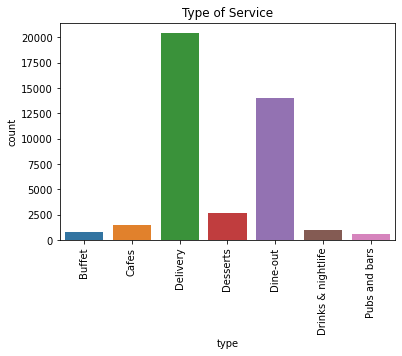

In [58]:
sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90)
fig.set_size_inches(15,15)
plt.title('Type of Service')
plt.savefig('Types of Service')

In [59]:
zomato.type.value_counts()

Delivery              20431
Dine-out              14062
Desserts               2709
Cafes                  1511
Drinks & nightlife     1045
Buffet                  847
Pubs and bars           632
Name: type, dtype: int64

WordCloud showing Resturant Type

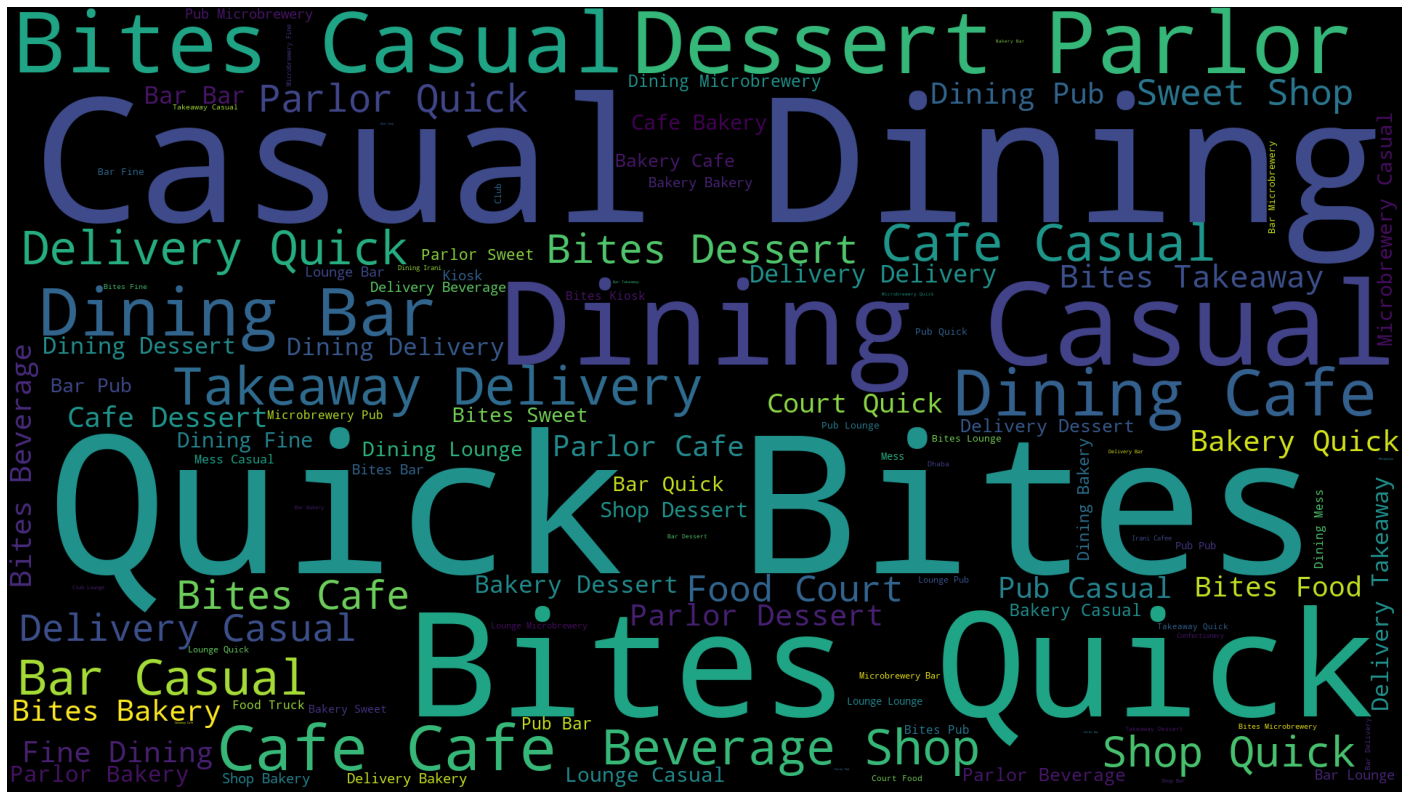

In [60]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='black',width=1920,height=1080).generate(" ".join(zomato['rest_type']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Conclusion

Highest correlation is 0.44 between votes & rating
Resturant accepting order online is 27081
Resturant booking the table is 6299
Resturant having Rating near to 5 have maximum no of votes
Resturant with max no of votes i.e., 16832, shop name is Byg Brewing Company
Location having Maximum no of resturant is BTM
CCD is having maximum no of stores i.e., 86
Max Resturants are Quick Bites
Maximum type of service is Delivery i.e., 20431
Better rating comes with more number of votes and it can increase your restaurant business

# Future Work

Random forest
Regression Analysis
Decision Tree